In [1]:
import numpy as np
import cv2
from scipy import signal
import matplotlib.pyplot as plt

# 1. Implement a discrete 2D Gaussian filter
using a 3 × 3 kernel with σ ≈ 1/2ln2. Use the provided lena.png as input, and plot the output image in your report. Briefly describe the effect of the filter.

In [2]:
def gaussian_kernels(size=3, sigma=1):

    upper = size - 1
    lower = - int(size / 2)

    y, x = np.mgrid[lower:upper, lower:upper]

    kernel = (1 / (2 * np.pi * sigma**2 ) ) * np.exp( -(x**2 + y**2) / (2 * sigma**2) )
    # kernel = kernel / kernel.sum()

    return kernel

[[Python]Gaussian Filter-概念與實作](https://medium.com/@bob800530/python-gaussian-filter-%E6%A6%82%E5%BF%B5%E8%88%87%E5%AF%A6%E4%BD%9C-676aac52ea17)

In [3]:
gaussian_kernels()

array([[0.05854983, 0.09653235, 0.05854983],
       [0.09653235, 0.15915494, 0.09653235],
       [0.05854983, 0.09653235, 0.05854983]])

image:
 [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]] 

post_gf_convolution:
 [[149 190 190 ... 190 190 149]
 [190 243 243 ... 243 243 190]
 [190 243 243 ... 243 243 190]
 ...
 [190 243 243 ... 243 243 190]
 [190 243 243 ... 243 243 190]
 [149 190 190 ... 190 190 149]] 



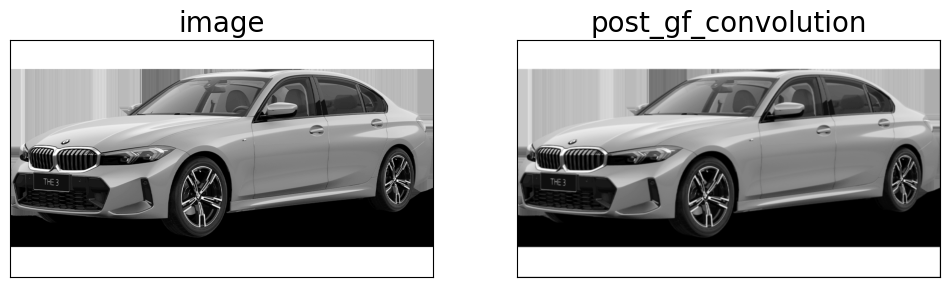

In [4]:
image = cv2.imread('/content/BMW.png', cv2.IMREAD_GRAYSCALE)

# cv2.imshow('image', image)
print('image:\n', image, '\n')

post_gf_convolution = signal.convolve2d(
    image,
    gaussian_kernels( sigma = 1 / ( 2 * np.log(2) ) ),
    mode='same', boundary='fill', fillvalue=0
)
# mode='same', boundary='symm'
# mode='same', boundary='fill', fillvalue=0
post_gf_convolution = np.round(post_gf_convolution)
post_gf_convolution = post_gf_convolution.astype(np.uint8)

# cv2.imshow('post_gf_convolution', post_gf_convolution)
print('post_gf_convolution:\n', post_gf_convolution, '\n')

images = [image, post_gf_convolution]
images_title = ['image', 'post_gf_convolution']

plt.figure(figsize=(12, 6))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(images[i], cmap=plt.get_cmap('gray'))
    plt.title(images_title[i], fontsize=20)
    plt.xticks([]), plt.yticks([])

# cv2.waitKey(0)
# cv2.destroyAllWindows()

# 2. Consider the image I(x, y) as a function I : R2 → R.
When detecting edges in an image, it is often important to extract information from the derivatives of pixel values. Denote the derivatives as follows: <br>
Ix(x, y) = ∂I/∂x ≈ 1/2(I(x + 1, y) − I(x − 1, y)) <br>
Iy(x, y) = ∂I/∂y ≈ 1/2(I(x, y + 1) − I(x, y − 1)).

Implement the 1D convolution kernels kx ∈ R1×3 and ky ∈ R3×1 such that<br>
Ix = kx ∗ I <br>
Iy = ky ∗ I.

Write down your answers of kx and ky. Also, plot the resulting images Ix and Iy using the
provided lena.png as input.



In [5]:
kx = np.array([[-0.5, 0, 0.5]])
ky = np.array([
    [-0.5],
    [0],
    [0.5]
])
# kx.shape, ky.shape

image:
 [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]] 

post_kx_convolution:
 [[128   0   0 ...   0   0 128]
 [128   0   0 ...   0   0 128]
 [128   0   0 ...   0   0 128]
 ...
 [128   0   0 ...   0   0 128]
 [128   0   0 ...   0   0 128]
 [128   0   0 ...   0   0 128]] 

post_ky_convolution
 [[128 128 128 ... 128 128 128]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [128 128 128 ... 128 128 128]] 



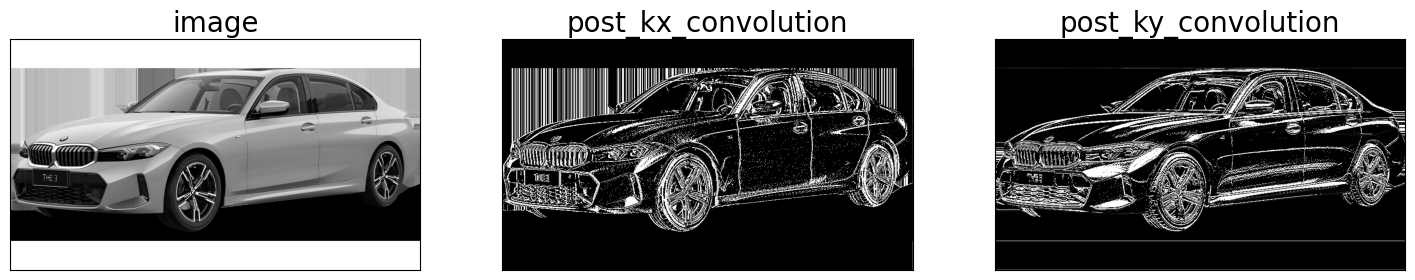

In [6]:
# cv2.imshow('image', image)
print('image:\n', image, '\n')

post_kx_convolution = signal.convolve(image, kx, mode='same')
post_kx_convolution = np.round(post_kx_convolution)
post_kx_convolution = post_kx_convolution.astype(np.uint8)

post_ky_convolution = signal.convolve(image, ky, mode='same')
post_ky_convolution = np.round(post_ky_convolution)
post_ky_convolution = post_ky_convolution.astype(np.uint8)

# cv2.imshow('post_kx_convolution', post_kx_convolution)
# cv2.imshow('post_ky_convolution', post_ky_convolution)
print('post_kx_convolution:\n', post_kx_convolution, '\n')
print('post_ky_convolution\n', post_ky_convolution, '\n')

images = [image, post_kx_convolution, post_ky_convolution]
images_title = ['image', 'post_kx_convolution', 'post_ky_convolution']

plt.figure(figsize=(18, 6))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap=plt.get_cmap('gray'))
    plt.title(images_title[i], fontsize=20)
    plt.xticks([]), plt.yticks([])

# cv2.waitKey(0)
# cv2.destroyAllWindows()

# 3. Define the gradient magnitude image Im as
Im(x, y) = q(Ix(x, y)2 + Iy(x, y)2).

Use both the provided lena.png and the Gaussian-filtered image you obtained in 1. as input images. <br>
Plot the two output gradient magnitude images in your report. Briefly explain the differences in the results.

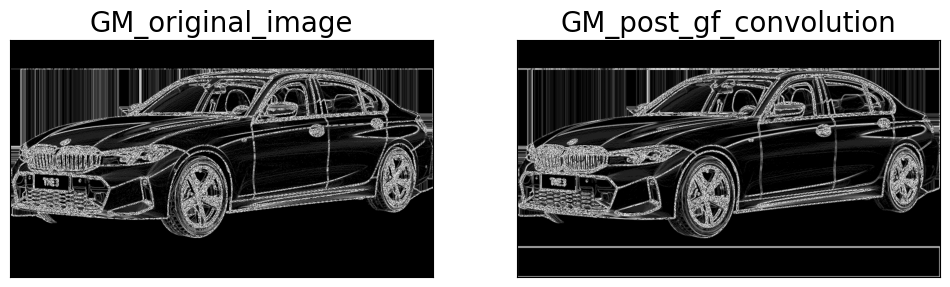

In [7]:
# gradient_magnitude_original_image
gradient_magnitude_original_image = (post_kx_convolution**2 + post_ky_convolution**2)**(1/2)

# gradient_magnitude_post_gf_convolution
post_kx_convolution_gf = signal.convolve(post_gf_convolution, kx, mode='same')
post_kx_convolution_gf = np.round(post_kx_convolution_gf)
post_kx_convolution_gf = post_kx_convolution_gf.astype(np.uint8)

post_ky_convolution_gf = signal.convolve(post_gf_convolution, ky, mode='same')
post_ky_convolution_gf = np.round(post_ky_convolution_gf)
post_ky_convolution_gf = post_ky_convolution_gf.astype(np.uint8)

gradient_magnitude_post_gf_convolution = (post_kx_convolution_gf**2 + post_ky_convolution_gf**2)**(1/2)

# plot them out
images = [gradient_magnitude_original_image, gradient_magnitude_post_gf_convolution]
images_title = ['GM_original_image', 'GM_post_gf_convolution']

plt.figure(figsize=(12, 6))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(images[i], cmap=plt.get_cmap('gray'))
    plt.title(images_title[i], fontsize=20)
    plt.xticks([]), plt.yticks([])